In [ ]:
# load dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
tx_energy = pd.read_csv("texas_energy_production.csv")  #usecols=[1],engine='python'
# texas_energy.set_index('Years', inplace=True)
tx_energy.head()

# Texas Coal forcast model 

In [3]:
tx_coal = tx_energy[["Coal_prod"]]
tx_coal.head()
# tx_coal.shape

,Coal_prod
0,26409.0
1,26535.0
2,25855.0
3,27441.0
4,28839.0


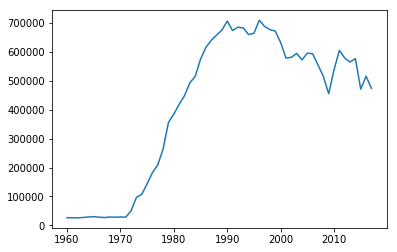

In [4]:
plt.plot(tx_energy.Years,tx_coal.Coal_prod)

In [5]:
tx_coal = tx_coal.values
tx_coal = tx_coal.astype('float32')

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
tx_coal = scaler.fit_transform(tx_coal)

In [7]:
# split into train and test sets
train_size = int(len(tx_coal) * 0.67)
test_size = len(tx_coal) - train_size
train, test = tx_coal[0:train_size,:], tx_coal[train_size:len(tx_coal),:]

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(state_data, look_back=1):
	dataX, dataY = [], []
	for i in range(len(state_data)-look_back-1):
		a = state_data[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(state_data[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back= 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.4253
Epoch 2/100
 - 0s - loss: 0.3693
Epoch 3/100
 - 0s - loss: 0.3201
Epoch 4/100
 - 0s - loss: 0.2807
Epoch 5/100
 - 0s - loss: 0.2458
Epoch 6/100
 - 0s - loss: 0.2169
Epoch 7/100
 - 0s - loss: 0.1926
Epoch 8/100
 - 0s - loss: 0.1742
Epoch 9/100
 - 0s - loss: 0.1559
Epoch 10/100
 - 0s - loss: 0.1428
Epoch 11/100
 - 0s - loss: 0.1305
Epoch 12/100
 - 0s - loss: 0.1204
Epoch 13/100
 - 0s - loss: 0.1128
Epoch 14/100
 - 0s - loss: 0.1047
Epoch 15/100
 - 0s - loss: 0.0981
Epoch 16/100
 - 0s - loss: 0.0916
Epoch 17/100
 - 0s - loss: 0.0864
Epoch 18/100
 - 0s - loss: 0.0809
Epoch 19/100
 - 0s - loss: 0.0749
Epoch 20/100
 - 0s - loss: 0.0700
Epoch 21/100
 - 0s - loss: 0.0648
Epoch 22/100
 - 0s - loss: 0.0598
Epoch 23/100
 - 0s - loss: 0.0550
Epoch 24/100
 - 0s - loss: 0.0506
Epoch 25/100
 - 0s - loss: 0.0458
Epoch 26/100
 - 0s - loss: 0.0414
Epoch

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19992.84 RMSE
Test Score: 58322.35 RMSE


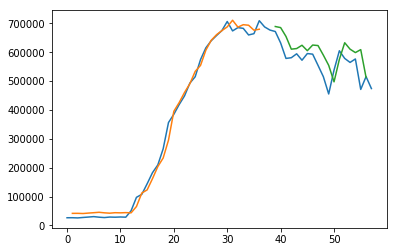

In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(tx_coal)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(tx_coal)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(tx_coal)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(tx_coal))
plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)
plt.show()

In [15]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX, trainY = create_dataset(tx_coal, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# re-create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.4954
Epoch 2/100
 - 0s - loss: 0.1276
Epoch 3/100
 - 0s - loss: 0.0271
Epoch 4/100
 - 0s - loss: 0.0215
Epoch 5/100
 - 0s - loss: 0.0183
Epoch 6/100
 - 0s - loss: 0.0127
Epoch 7/100
 - 0s - loss: 0.0101
Epoch 8/100
 - 0s - loss: 0.0088
Epoch 9/100
 - 0s - loss: 0.0075
Epoch 10/100
 - 0s - loss: 0.0069
Epoch 11/100
 - 0s - loss: 0.0065
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0057
Epoch 14/100
 - 0s - loss: 0.0054
Epoch 15/100
 - 0s - loss: 0.0054
Epoch 16/100
 - 0s - loss: 0.0051
Epoch 17/100
 - 0s - loss: 0.0046
Epoch 18/100
 - 0s - loss: 0.0048
Epoch 19/100
 - 0s - loss: 0.0045
Epoch 20/100
 - 0s - loss: 0.0044
Epoch 21/100
 - 0s - loss: 0.0043
Epoch 22/100
 - 0s - loss: 0.0038
Epoch 23/100
 - 0s - loss: 0.0042
Epoch 24/100
 - 0s - loss: 0.0042
Epoch 25/100
 - 0s - loss: 0.0037
Epoch 26/100
 - 0s - loss: 0.0037
Epoch 27/100
 - 0s - loss: 0.0035
Epoch 28/100
 - 0s - loss: 0.0035
Epoch 29/100
 - 0s - loss: 0.0035
Epoch 30/100
 - 0s - lo

58


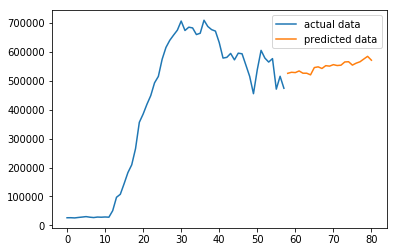

In [16]:
# making future prediction
flatten_state_data = tx_coal.reshape(-1)
val = flatten_state_data[-look_back:] # last batch in the training data
pred_list = []
for i in range(23): # predict the next 23 points
    pred = model.predict(val.reshape(1,1,look_back))
    pred_list = np.append(pred_list,pred)
    val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
pred_list = pred_list.reshape(pred_list.shape[0],1)

# invert prediction
pred_list = scaler.inverse_transform(pred_list)

# plot
data_len = len(tx_coal)
print(data_len)
plt.plot(list(range(data_len)),scaler.inverse_transform(tx_coal),label="actual data")
plt.plot(list(range(data_len,data_len+len(pred_list))),pred_list,label="predicted data")
plt.legend()
plt.show()

Texas Coal production 1960-2040 dataframe

In [17]:
L = pred_list
L

array([[525936.5319723 ],
       [529517.99813559],
       [528477.51438853],
       [534160.32252209],
       [526339.78360389],
       [526292.71856402],
       [520650.12964635],
       [545862.6066328 ],
       [548334.35657914],
       [542657.74228632],
       [552439.97651538],
       [550816.04926982],
       [555931.06150256],
       [552901.98813613],
       [554056.28370687],
       [565227.56822065],
       [566055.91292224],
       [554301.14416101],
       [561126.47141811],
       [565876.82127705],
       [575348.67073673],
       [584618.24239738],
       [571297.12466014]])

In [18]:
tx_coal_pre = pd.DataFrame(L, columns=["Coal_prod"])
tx_coal_pre.head()

,Coal_prod
0,525936.531972
1,529517.998136
2,528477.514389
3,534160.322522
4,526339.783604


In [19]:
pre_yrs = numpy.arange(2018, 2041, 1).tolist()
pre_yrs = pd.DataFrame({"Years":pre_yrs})
pre_yrs.head()

,Years
0,2018
1,2019
2,2020
3,2021
4,2022


In [20]:

coal_pred = pd.concat([pre_yrs, tx_coal_pre], axis=1, sort=False)
coal_pred.head()

,Years,Coal_prod
0,2018,525936.531972
1,2019,529517.998136
2,2020,528477.514389
3,2021,534160.322522
4,2022,526339.783604


In [21]:
tx_coal = tx_energy[["Years", "Coal_prod"]]
tx_coal.head()

,Years,Coal_prod
0,1960,26409.0
1,1961,26535.0
2,1962,25855.0
3,1963,27441.0
4,1964,28839.0


In [22]:
TexasCoal_prod_pre = pd.concat([tx_coal, coal_pred])
TexasCoal_prod_pre

,Years,Coal_prod
0,1960,26409.000000
1,1961,26535.000000
2,1962,25855.000000
3,1963,27441.000000
4,1964,28839.000000
5,1965,30349.000000
6,1966,28360.000000
7,1967,27102.000000
8,1968,28839.000000
9,1969,28310.000000


# Texas Gas Forcasting model

In [23]:
tx_gas = tx_energy[["Gas_prod"]]
tx_gas.head()

,Gas_prod
0,6602696.0
1,6682140.0
2,6812787.0
3,6952455.0
4,7311876.0


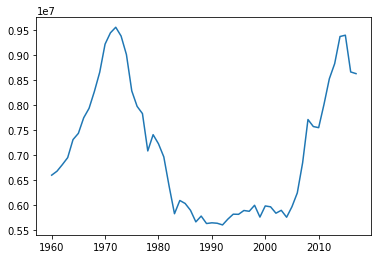

In [24]:
plt.plot(tx_energy.Years,tx_gas.Gas_prod)

In [25]:

scaler_tx_gas  = MinMaxScaler(feature_range=(0, 1))
tx_gas = scaler_tx_gas.fit_transform(tx_gas)

In [26]:
# split into train and test sets
train_size_tx_gas  = int(len(tx_gas ) * 0.67)
test_size_tx_gas  = len(tx_gas) - train_size_tx_gas 
train_tx_gas , test_tx_gas  = tx_gas [0:train_size_tx_gas,:], tx_gas [train_size_tx_gas :len(tx_gas),:]

In [27]:
# convert an array of values into a dataset matrix
def create_tx_gas(tx_gas, look_back=1):
	dataX_tx_gas, dataY_tx_gas = [], []
	for i_tx_gas in range(len(tx_gas)-look_back-1):
		a_tx_gas = tx_gas[i_tx_gas:(i_tx_gas+look_back), 0]
		dataX_tx_gas.append(a_tx_gas)
		dataY_tx_gas.append(tx_gas[i_tx_gas + look_back, 0])
	return numpy.array(dataX_tx_gas), numpy.array(dataY_tx_gas)

In [28]:
# reshape into X=t and Y=t+1
look_back = 1
trainX_tx_gas, trainY_tx_gas = create_tx_gas(train_tx_gas, look_back)
testX_tx_gas, testY_tx_gas = create_tx_gas(test_tx_gas, look_back)

In [29]:
# reshape input to be [samples, time steps, features]
trainX_tx_gas = numpy.reshape(trainX_tx_gas, (trainX_tx_gas.shape[0], 1, trainX_tx_gas.shape[1]))
testX_tx_gas = numpy.reshape(testX_tx_gas, (testX_tx_gas.shape[0], 1, testX_tx_gas.shape[1]))

In [30]:
# create and fit the LSTM network
model_tx_gas = Sequential()
model_tx_gas.add(LSTM(4, input_shape=(1, look_back)))
model_tx_gas.add(Dense(1))
model_tx_gas.compile(loss='mean_squared_error', optimizer='adam')
model_tx_gas.fit(trainX_tx_gas, trainY_tx_gas, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.2013
Epoch 2/100
 - 0s - loss: 0.1686
Epoch 3/100
 - 0s - loss: 0.1433
Epoch 4/100
 - 0s - loss: 0.1225
Epoch 5/100
 - 0s - loss: 0.1050
Epoch 6/100
 - 0s - loss: 0.0927
Epoch 7/100
 - 0s - loss: 0.0823
Epoch 8/100
 - 0s - loss: 0.0747
Epoch 9/100
 - 0s - loss: 0.0689
Epoch 10/100
 - 0s - loss: 0.0648
Epoch 11/100
 - 0s - loss: 0.0613
Epoch 12/100
 - 0s - loss: 0.0578
Epoch 13/100
 - 0s - loss: 0.0549
Epoch 14/100
 - 0s - loss: 0.0524
Epoch 15/100
 - 0s - loss: 0.0498
Epoch 16/100
 - 0s - loss: 0.0473
Epoch 17/100
 - 0s - loss: 0.0451
Epoch 18/100
 - 0s - loss: 0.0426
Epoch 19/100
 - 0s - loss: 0.0401
Epoch 20/100
 - 0s - loss: 0.0377
Epoch 21/100
 - 0s - loss: 0.0355
Epoch 22/100
 - 0s - loss: 0.0333
Epoch 23/100
 - 0s - loss: 0.0312
Epoch 24/100
 - 0s - loss: 0.0288
Epoch 25/100
 - 0s - loss: 0.0269
Epoch 26/100
 - 0s - loss: 0.0252
Epoch 27/100
 - 0s - loss: 0.0228
Epoch 28/100
 - 0s - loss: 0.0211
Epoch 29/100
 - 0s - loss: 0.0195
Epoch 30/100
 - 0s - lo

In [31]:
# make predictions
trainPredict_tx_gas = model_tx_gas.predict(trainX_tx_gas)
testPredict_tx_gas = model_tx_gas.predict(testX_tx_gas)

In [32]:
# invert predictions
trainPredict_tx_gas = scaler_tx_gas.inverse_transform(trainPredict_tx_gas)
trainY_tx_gas = scaler_tx_gas.inverse_transform([trainY_tx_gas])
testPredict_tx_gas = scaler_tx_gas.inverse_transform(testPredict_tx_gas)
testY_tx_gas = scaler_tx_gas.inverse_transform([testY_tx_gas])
# calculate root mean squared error
trainScore_tx_gas = math.sqrt(mean_squared_error(trainY_tx_gas[0], trainPredict_tx_gas[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_tx_gas))
testScore_tx_gas = math.sqrt(mean_squared_error(testY_tx_gas[0], testPredict_tx_gas[:,0]))
print('Test Score: %.2f RMSE' % (testScore_tx_gas))

Train Score: 303468.12 RMSE
Test Score: 393473.29 RMSE


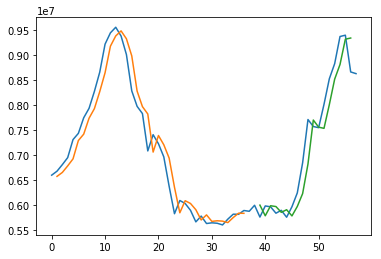

In [33]:
# shift train predictions for plotting
trainPredictPlot_tx_gas = numpy.empty_like(tx_gas)
trainPredictPlot_tx_gas[:, :] = numpy.nan
trainPredictPlot_tx_gas[look_back:len(trainPredict_tx_gas)+look_back, :] = trainPredict_tx_gas
# shift test predictions for plotting
testPredictPlot_tx_gas = numpy.empty_like(tx_gas)
testPredictPlot_tx_gas[:, :] = numpy.nan
testPredictPlot_tx_gas[len(trainPredict_tx_gas)+(look_back*2)+1:len(tx_gas)-1, :] = testPredict_tx_gas
# plot baseline and predictions
plt.plot(scaler_tx_gas.inverse_transform(tx_gas))
plt.plot(trainPredictPlot_tx_gas)
plt.plot(testPredictPlot_tx_gas)
plt.show()

In [34]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_gas, trainY_tx_gas = create_tx_gas(tx_gas, look_back)
trainX_tx_gas = numpy.reshape(trainX_tx_gas, (trainX_tx_gas.shape[0], 1, trainX_tx_gas.shape[1]))

# re-create and fit the LSTM network
model_tx_gas = Sequential()
model_tx_gas.add(LSTM(4, input_shape=(1, look_back)))
model_tx_gas.add(Dense(1))
model_tx_gas.compile(loss='mean_squared_error', optimizer='adam')
model_tx_gas.fit(trainX_tx_gas, trainY_tx_gas, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.2988
Epoch 2/100
 - 0s - loss: 0.1891
Epoch 3/100
 - 0s - loss: 0.1268
Epoch 4/100
 - 0s - loss: 0.0944
Epoch 5/100
 - 0s - loss: 0.0756
Epoch 6/100
 - 0s - loss: 0.0629
Epoch 7/100
 - 0s - loss: 0.0532
Epoch 8/100
 - 0s - loss: 0.0439
Epoch 9/100
 - 0s - loss: 0.0370
Epoch 10/100
 - 0s - loss: 0.0294
Epoch 11/100
 - 0s - loss: 0.0249
Epoch 12/100
 - 0s - loss: 0.0215
Epoch 13/100
 - 0s - loss: 0.0187
Epoch 14/100
 - 0s - loss: 0.0168
Epoch 15/100
 - 0s - loss: 0.0154
Epoch 16/100
 - 0s - loss: 0.0141
Epoch 17/100
 - 0s - loss: 0.0133
Epoch 18/100
 - 0s - loss: 0.0125
Epoch 19/100
 - 0s - loss: 0.0119
Epoch 20/100
 - 0s - loss: 0.0119
Epoch 21/100
 - 0s - loss: 0.0110
Epoch 22/100
 - 0s - loss: 0.0110
Epoch 23/100
 - 0s - loss: 0.0103
Epoch 24/100
 - 0s - loss: 0.0098
Epoch 25/100
 - 0s - loss: 0.0096
Epoch 26/100
 - 0s - loss: 0.0092
Epoch 27/100
 - 0s - loss: 0.0091
Epoch 28/100
 - 0s - loss: 0.0091
Epoch 29/100
 - 0s - loss: 0.0085
Epoch 30/100
 - 0s - lo

58


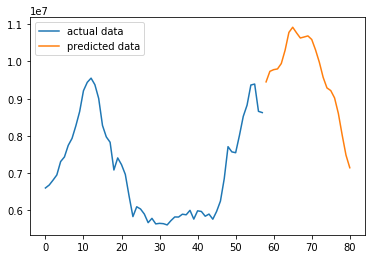

In [35]:
# making future prediction
flatten_tx_gas = tx_gas.reshape(-1)
val_tx_gas = flatten_tx_gas[-look_back:] # last batch in the training data
pred_list_tx_gas = []
for i_tx_gas in range(23): # predict the next 23 points
    pred_tx_gas = model_tx_gas.predict(val_tx_gas.reshape(1,1,look_back))
    pred_list_tx_gas = np.append(pred_list_tx_gas,pred_tx_gas)
    val_tx_gas = np.append(np.delete(val_tx_gas, 0),pred_tx_gas) # update the data batch to be fed in the next iteration
pred_list_tx_gas = pred_list_tx_gas.reshape(pred_list_tx_gas.shape[0],1)

# invert prediction
pred_list_tx_gas = scaler_tx_gas.inverse_transform(pred_list_tx_gas)

# plot
tx_gas_len = len(tx_gas)
print(tx_gas_len)
plt.plot(list(range(tx_gas_len)),scaler_tx_gas.inverse_transform(tx_gas),label="actual data")
plt.plot(list(range(tx_gas_len,tx_gas_len+len(pred_list_tx_gas))),pred_list_tx_gas,label="predicted data")
plt.legend()
plt.show()

texas gas production 1960-2040

In [36]:
L_gas = pred_list_tx_gas
tx_gas_pre = pd.DataFrame(L_gas, columns=["Gas_prod"])
tx_gas_pre.head()
# pre_yrs = numpy.arange(2018, 2041, 1).tolist()
# pre_yrs = pd.DataFrame({"Years":pre_yrs})
# pre_yrs.head()
gas_pred = pd.concat([pre_yrs, tx_gas_pre], axis=1, sort=False)
gas_pred.head()
tx_gas = tx_energy[["Years", "Gas_prod"]]
tx_gas.head()
Texasgas_prod_pre = pd.concat([tx_gas, gas_pred])
Texasgas_prod_pre.head()

,Years,Gas_prod
0,1960,6602696.0
1,1961,6682140.0
2,1962,6812787.0
3,1963,6952455.0
4,1964,7311876.0


# Texas Oil Forcasting  model 

In [37]:
tx_oil = tx_energy[["Oil_prod"]]
tx_oil.head()

,Oil_prod
0,5379378.0
1,5447308.0
2,5471272.0
3,5671135.0
4,5739216.0


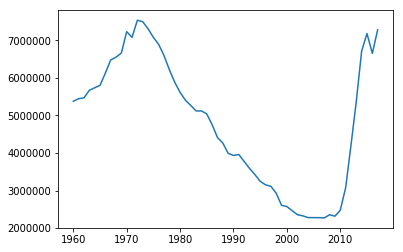

In [38]:
tx_oil = tx_energy[["Oil_prod"]]
tx_oil.head()
plt.plot(tx_energy.Years,tx_oil.Oil_prod)


In [39]:
scaler_tx_oil  = MinMaxScaler(feature_range=(0, 1))
tx_oil = scaler_tx_oil.fit_transform(tx_oil)

# split into train and test sets
train_size_tx_oil  = int(len(tx_oil) * 0.67)
test_size_tx_oil  = len(tx_oil) - train_size_tx_oil 
train_tx_oil , test_tx_oil  = tx_oil [0:train_size_tx_oil,:], tx_oil [train_size_tx_oil :len(tx_oil),:]

# convert an array of values into a dataset matrix
def create_tx_oil(tx_oil, look_back=1):
	dataX_tx_oil, dataY_tx_oil = [], []
	for i_tx_oil in range(len(tx_oil)-look_back-1):
		a_tx_oil = tx_oil[i_tx_oil:(i_tx_oil+look_back), 0]
		dataX_tx_oil.append(a_tx_oil)
		dataY_tx_oil.append(tx_oil[i_tx_oil + look_back, 0])
	return numpy.array(dataX_tx_oil), numpy.array(dataY_tx_oil)

# reshape into X=t and Y=t+1
look_back = 1
trainX_tx_oil, trainY_tx_oil = create_tx_oil(train_tx_oil, look_back)
testX_tx_oil, testY_tx_oil = create_tx_oil(test_tx_oil, look_back)


# reshape input to be [samples, time steps, features]
trainX_tx_oil = numpy.reshape(trainX_tx_oil, (trainX_tx_oil.shape[0], 1, trainX_tx_oil.shape[1]))
testX_tx_oil = numpy.reshape(testX_tx_oil, (testX_tx_oil.shape[0], 1, testX_tx_oil.shape[1]))

# create and fit the LSTM network
model_tx_oil = Sequential()
model_tx_oil.add(LSTM(4, input_shape=(1, look_back)))
model_tx_oil.add(Dense(1))
model_tx_oil.compile(loss='mean_squared_error', optimizer='adam')
model_tx_oil.fit(trainX_tx_oil, trainY_tx_oil, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.3996
Epoch 2/100
 - 0s - loss: 0.3252
Epoch 3/100
 - 0s - loss: 0.2639
Epoch 4/100
 - 0s - loss: 0.2069
Epoch 5/100
 - 0s - loss: 0.1606
Epoch 6/100
 - 0s - loss: 0.1222
Epoch 7/100
 - 0s - loss: 0.0919
Epoch 8/100
 - 0s - loss: 0.0698
Epoch 9/100
 - 0s - loss: 0.0537
Epoch 10/100
 - 0s - loss: 0.0438
Epoch 11/100
 - 0s - loss: 0.0372
Epoch 12/100
 - 0s - loss: 0.0337
Epoch 13/100
 - 0s - loss: 0.0313
Epoch 14/100
 - 0s - loss: 0.0304
Epoch 15/100
 - 0s - loss: 0.0292
Epoch 16/100
 - 0s - loss: 0.0284
Epoch 17/100
 - 0s - loss: 0.0276
Epoch 18/100
 - 0s - loss: 0.0271
Epoch 19/100
 - 0s - loss: 0.0264
Epoch 20/100
 - 0s - loss: 0.0257
Epoch 21/100
 - 0s - loss: 0.0250
Epoch 22/100
 - 0s - loss: 0.0245
Epoch 23/100
 - 0s - loss: 0.0237
Epoch 24/100
 - 0s - loss: 0.0229
Epoch 25/100
 - 0s - loss: 0.0224
Epoch 26/100
 - 0s - loss: 0.0216
Epoch 27/100
 - 0s - loss: 0.0210
Epoch 28/100
 - 0s - loss: 0.0204
Epoch 29/100
 - 0s - loss: 0.0198
Epoch 30/100
 - 0s - lo

In [40]:
# make predictions
trainPredict_tx_oil = model_tx_oil.predict(trainX_tx_oil)
testPredict_tx_oil = model_tx_oil.predict(testX_tx_oil)
# invert predictions
trainPredict_tx_oil = scaler_tx_oil.inverse_transform(trainPredict_tx_oil)
trainY_tx_oil = scaler_tx_oil.inverse_transform([trainY_tx_oil])
testPredict_tx_oil = scaler_tx_oil.inverse_transform(testPredict_tx_oil)
testY_tx_oil = scaler_tx_oil.inverse_transform([testY_tx_oil])
# calculate root mean squared error
trainScore_tx_oil = math.sqrt(mean_squared_error(trainY_tx_oil[0], trainPredict_tx_oil[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_tx_oil))
testScore_tx_oil = math.sqrt(mean_squared_error(testY_tx_oil[0], testPredict_tx_oil[:,0]))
print('Test Score: %.2f RMSE' % (testScore_tx_oil))

Train Score: 228238.45 RMSE
Test Score: 602126.43 RMSE


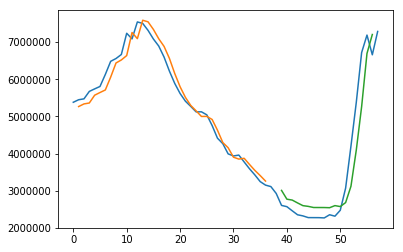

In [41]:
# shift train predictions for plotting
trainPredictPlot_tx_oil = numpy.empty_like(tx_oil)
trainPredictPlot_tx_oil[:, :] = numpy.nan
trainPredictPlot_tx_oil[look_back:len(trainPredict_tx_oil)+look_back, :] = trainPredict_tx_oil
# shift test predictions for plotting
testPredictPlot_tx_oil = numpy.empty_like(tx_oil)
testPredictPlot_tx_oil[:, :] = numpy.nan
testPredictPlot_tx_oil[len(trainPredict_tx_oil)+(look_back*2)+1:len(tx_oil)-1, :] = testPredict_tx_oil
# plot baseline and predictions
plt.plot(scaler_tx_oil.inverse_transform(tx_oil))
plt.plot(trainPredictPlot_tx_oil)
plt.plot(testPredictPlot_tx_oil)
plt.show()

In [42]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_oil, trainY_tx_oil = create_tx_gas(tx_oil, look_back)
trainX_tx_oil = numpy.reshape(trainX_tx_oil, (trainX_tx_oil.shape[0], 1, trainX_tx_oil.shape[1]))

# re-create and fit the LSTM network
model_tx_oil = Sequential()
model_tx_oil.add(LSTM(4, input_shape=(1, look_back)))
model_tx_oil.add(Dense(1))
model_tx_oil.compile(loss='mean_squared_error', optimizer='adam')
model_tx_oil.fit(trainX_tx_oil, trainY_tx_oil, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.1005
Epoch 2/100
 - 0s - loss: 0.0902
Epoch 3/100
 - 0s - loss: 0.0857
Epoch 4/100
 - 0s - loss: 0.0832
Epoch 5/100
 - 0s - loss: 0.0771
Epoch 6/100
 - 0s - loss: 0.0749
Epoch 7/100
 - 0s - loss: 0.0692
Epoch 8/100
 - 0s - loss: 0.0659
Epoch 9/100
 - 0s - loss: 0.0617
Epoch 10/100
 - 0s - loss: 0.0574
Epoch 11/100
 - 0s - loss: 0.0531
Epoch 12/100
 - 0s - loss: 0.0492
Epoch 13/100
 - 0s - loss: 0.0443
Epoch 14/100
 - 0s - loss: 0.0397
Epoch 15/100
 - 0s - loss: 0.0365
Epoch 16/100
 - 0s - loss: 0.0323
Epoch 17/100
 - 0s - loss: 0.0279
Epoch 18/100
 - 0s - loss: 0.0246
Epoch 19/100
 - 0s - loss: 0.0220
Epoch 20/100
 - 0s - loss: 0.0189
Epoch 21/100
 - 0s - loss: 0.0168
Epoch 22/100
 - 0s - loss: 0.0154
Epoch 23/100
 - 0s - loss: 0.0129
Epoch 24/100
 - 0s - loss: 0.0115
Epoch 25/100
 - 0s - loss: 0.0103
Epoch 26/100
 - 0s - loss: 0.0093
Epoch 27/100
 - 0s - loss: 0.0089
Epoch 28/100
 - 0s - loss: 0.0078
Epoch 29/100
 - 0s - loss: 0.0072
Epoch 30/100
 - 0s - lo

58


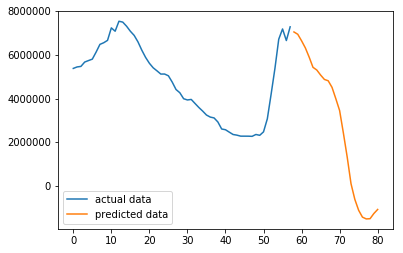

In [43]:
# making future prediction
flatten_tx_oil = tx_oil.reshape(-1)
val_tx_oil = flatten_tx_oil[-look_back:] # last batch in the training data
pred_list_tx_oil = []
for i_tx_oil in range(23): # predict the next 23 points
    pred_tx_oil = model_tx_oil.predict(val_tx_oil.reshape(1,1,look_back))
    pred_list_tx_oil = np.append(pred_list_tx_oil,pred_tx_oil)
    val_tx_oil = np.append(np.delete(val_tx_oil, 0),pred_tx_oil) # update the data batch to be fed in the next iteration
pred_list_tx_oil = pred_list_tx_oil.reshape(pred_list_tx_oil.shape[0],1)

# invert prediction
pred_list_tx_oil = scaler_tx_oil.inverse_transform(pred_list_tx_oil)

# plot
tx_oil_len = len(tx_oil)
print(tx_oil_len)
plt.plot(list(range(tx_oil_len)),scaler_tx_oil.inverse_transform(tx_oil),label="actual data")
plt.plot(list(range(tx_oil_len,tx_oil_len+len(pred_list_tx_oil))),pred_list_tx_oil,label="predicted data")
plt.legend()
plt.show()

texas crude oil production 1965-2040

In [46]:
L_oil = pred_list_tx_oil
tx_oil_pre = pd.DataFrame(L_oil, columns=["Oil_prod"])
# tx_oil_pre.head()
# pre_yrs = numpy.arange(2018, 2041, 1).tolist()
# pre_yrs = pd.DataFrame({"Years":pre_yrs})
# pre_yrs.head()
oil_pred = pd.concat([pre_yrs, tx_oil_pre], axis=1, sort=False)
gas_pred.head()
tx_oil = tx_energy[["Years", "Oil_prod"]]
tx_oil.head()
TexasOil_prod_pre = pd.concat([tx_oil, oil_pred])
TexasOil_prod_pre.head()

,Years,Oil_prod
0,1960,5379378.0
1,1961,5447308.0
2,1962,5471272.0
3,1963,5671135.0
4,1964,5739216.0


# Texas Renewable_en_prod  Forcasting model 

In [47]:
tx_Renewable = tx_energy[["Renewable_en_prod"]]
tx_Renewable.head()


,Renewable_en_prod
0,50155.0
1,52023.0
2,47721.0
3,42718.0
4,43884.0


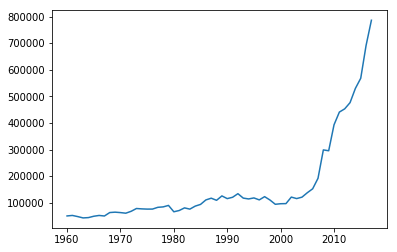

In [48]:
plt.plot(tx_energy.Years,tx_Renewable.Renewable_en_prod)

In [49]:
scaler_tx_Renewable  = MinMaxScaler(feature_range=(0, 1))
tx_Renewable = scaler_tx_Renewable.fit_transform(tx_Renewable)

# split into train and test sets
train_size_tx_Renewable  = int(len(tx_Renewable) * 0.67)
test_size_tx_Renewable  = len(tx_Renewable) - train_size_tx_Renewable 
train_tx_Renewable , test_tx_Renewable  = tx_Renewable [0:train_size_tx_Renewable,:], tx_Renewable [train_size_tx_Renewable :len(tx_Renewable),:]

# convert an array of values into a dataset matrix
def create_tx_Renewable(tx_Renewable, look_back=1):
	dataX_tx_Renewable, dataY_tx_Renewable = [], []
	for i_tx_Renewable in range(len(tx_Renewable)-look_back-1):
		a_tx_Renewable = tx_Renewable[i_tx_Renewable:(i_tx_Renewable+look_back), 0]
		dataX_tx_Renewable.append(a_tx_Renewable)
		dataY_tx_Renewable.append(tx_Renewable[i_tx_Renewable + look_back, 0])
	return numpy.array(dataX_tx_Renewable), numpy.array(dataY_tx_Renewable)

# reshape into X=t and Y=t+1
look_back = 1
trainX_tx_Renewable, trainY_tx_Renewable = create_tx_Renewable(train_tx_Renewable, look_back)
testX_tx_Renewable, testY_tx_Renewable = create_tx_Renewable(test_tx_Renewable, look_back)


# reshape input to be [samples, time steps, features]
trainX_tx_Renewable = numpy.reshape(trainX_tx_Renewable, (trainX_tx_Renewable.shape[0], 1, trainX_tx_Renewable.shape[1]))
testX_tx_Renewable = numpy.reshape(testX_tx_Renewable, (testX_tx_Renewable.shape[0], 1, testX_tx_Renewable.shape[1]))

# create and fit the LSTM network
model_tx_Renewable = Sequential()
model_tx_Renewable.add(LSTM(4, input_shape=(1, look_back)))
model_tx_Renewable.add(Dense(1))
model_tx_Renewable.compile(loss='mean_squared_error', optimizer='adam')
model_tx_Renewable.fit(trainX_tx_Renewable, trainY_tx_Renewable, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0022
Epoch 2/100
 - 0s - loss: 0.0011
Epoch 3/100
 - 0s - loss: 0.0011
Epoch 4/100
 - 0s - loss: 0.0011
Epoch 5/100
 - 0s - loss: 0.0010
Epoch 6/100
 - 0s - loss: 0.0011
Epoch 7/100
 - 0s - loss: 9.8888e-04
Epoch 8/100
 - 0s - loss: 9.2899e-04
Epoch 9/100
 - 0s - loss: 9.0204e-04
Epoch 10/100
 - 0s - loss: 8.7493e-04
Epoch 11/100
 - 0s - loss: 8.5377e-04
Epoch 12/100
 - 0s - loss: 8.6420e-04
Epoch 13/100
 - 0s - loss: 7.8611e-04
Epoch 14/100
 - 0s - loss: 7.5553e-04
Epoch 15/100
 - 0s - loss: 7.0981e-04
Epoch 16/100
 - 0s - loss: 6.8511e-04
Epoch 17/100
 - 0s - loss: 6.5688e-04
Epoch 18/100
 - 0s - loss: 6.3857e-04
Epoch 19/100
 - 0s - loss: 6.0876e-04
Epoch 20/100
 - 0s - loss: 5.6548e-04
Epoch 21/100
 - 0s - loss: 5.5962e-04
Epoch 22/100
 - 0s - loss: 5.2754e-04
Epoch 23/100
 - 0s - loss: 4.8738e-04
Epoch 24/100
 - 0s - loss: 4.8445e-04
Epoch 25/100
 - 0s - loss: 4.4025e-04
Epoch 26/100
 - 0s - loss: 4.2595e-04
Epoch 27/100
 - 0s - loss: 3.8702e-04
Epoch 2

In [50]:
# make predictions
trainPredict_tx_Renewable = model_tx_Renewable.predict(trainX_tx_Renewable)
testPredict_tx_Renewable = model_tx_Renewable.predict(testX_tx_Renewable)
# invert predictions
trainPredict_tx_Renewable = scaler_tx_Renewable.inverse_transform(trainPredict_tx_Renewable)
trainY_tx_Renewable = scaler_tx_Renewable.inverse_transform([trainY_tx_Renewable])
testPredict_tx_Renewable = scaler_tx_Renewable.inverse_transform(testPredict_tx_Renewable)
testY_tx_Renewable = scaler_tx_Renewable.inverse_transform([testY_tx_Renewable])
# calculate root mean squared error
trainScore_tx_Renewable = math.sqrt(mean_squared_error(trainY_tx_Renewable[0], trainPredict_tx_Renewable[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_tx_Renewable))
testScore_tx_Renewable = math.sqrt(mean_squared_error(testY_tx_Renewable[0], testPredict_tx_Renewable[:,0]))
print('Test Score: %.2f RMSE' % (testScore_tx_Renewable))

Train Score: 8649.53 RMSE
Test Score: 47688.58 RMSE


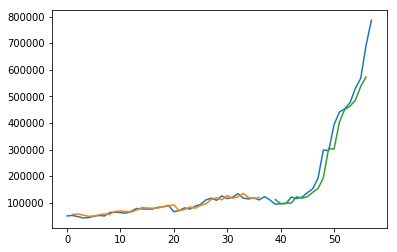

In [51]:
# shift train predictions for plotting
trainPredictPlot_tx_Renewable = numpy.empty_like(tx_Renewable)
trainPredictPlot_tx_Renewable[:, :] = numpy.nan
trainPredictPlot_tx_Renewable[look_back:len(trainPredict_tx_Renewable)+look_back, :] = trainPredict_tx_Renewable
# shift test predictions for plotting
testPredictPlot_tx_Renewable = numpy.empty_like(tx_Renewable)
testPredictPlot_tx_Renewable[:, :] = numpy.nan
testPredictPlot_tx_Renewable[len(trainPredict_tx_Renewable)+(look_back*2)+1:len(tx_Renewable)-1, :] = testPredict_tx_Renewable
# plot baseline and predictions
plt.plot(scaler_tx_Renewable.inverse_transform(tx_Renewable))
plt.plot(trainPredictPlot_tx_Renewable)
plt.plot(testPredictPlot_tx_Renewable)
plt.show()

In [52]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_Renewable, trainY_tx_Renewable = create_tx_Renewable(tx_Renewable, look_back)
trainX_tx_Renewable = numpy.reshape(trainX_tx_Renewable, (trainX_tx_Renewable.shape[0], 1, trainX_tx_Renewable.shape[1]))

# re-create and fit the LSTM network
model_tx_Renewable = Sequential()
model_tx_Renewable.add(LSTM(4, input_shape=(1, look_back)))
model_tx_Renewable.add(Dense(1))
model_tx_Renewable.compile(loss='mean_squared_error', optimizer='adam')
model_tx_Renewable.fit(trainX_tx_Renewable, trainY_tx_Renewable, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0858
Epoch 2/100
 - 0s - loss: 0.0588
Epoch 3/100
 - 0s - loss: 0.0432
Epoch 4/100
 - 0s - loss: 0.0327
Epoch 5/100
 - 0s - loss: 0.0268
Epoch 6/100
 - 0s - loss: 0.0232
Epoch 7/100
 - 0s - loss: 0.0208
Epoch 8/100
 - 0s - loss: 0.0185
Epoch 9/100
 - 0s - loss: 0.0165
Epoch 10/100
 - 0s - loss: 0.0146
Epoch 11/100
 - 0s - loss: 0.0129
Epoch 12/100
 - 0s - loss: 0.0115
Epoch 13/100
 - 0s - loss: 0.0099
Epoch 14/100
 - 0s - loss: 0.0086
Epoch 15/100
 - 0s - loss: 0.0075
Epoch 16/100
 - 0s - loss: 0.0066
Epoch 17/100
 - 0s - loss: 0.0057
Epoch 18/100
 - 0s - loss: 0.0052
Epoch 19/100
 - 0s - loss: 0.0045
Epoch 20/100
 - 0s - loss: 0.0040
Epoch 21/100
 - 0s - loss: 0.0040
Epoch 22/100
 - 0s - loss: 0.0034
Epoch 23/100
 - 0s - loss: 0.0033
Epoch 24/100
 - 0s - loss: 0.0030
Epoch 25/100
 - 0s - loss: 0.0028
Epoch 26/100
 - 0s - loss: 0.0028
Epoch 27/100
 - 0s - loss: 0.0027
Epoch 28/100
 - 0s - loss: 0.0026
Epoch 29/100
 - 0s - loss: 0.0025
Epoch 30/100
 - 0s - lo

Epoch 1/100
 - 4s - loss: 0.1417
Epoch 2/100
 - 0s - loss: 0.1047
Epoch 3/100
 - 0s - loss: 0.0794
Epoch 4/100
 - 0s - loss: 0.0617
Epoch 5/100
 - 0s - loss: 0.0515
Epoch 6/100
 - 0s - loss: 0.0412
Epoch 7/100
 - 0s - loss: 0.0355
Epoch 8/100
 - 0s - loss: 0.0316
Epoch 9/100
 - 0s - loss: 0.0292
Epoch 10/100
 - 0s - loss: 0.0264
Epoch 11/100
 - 0s - loss: 0.0244
Epoch 12/100
 - 0s - loss: 0.0220
Epoch 13/100
 - 0s - loss: 0.0198
Epoch 14/100
 - 0s - loss: 0.0179
Epoch 15/100
 - 0s - loss: 0.0161
Epoch 16/100
 - 0s - loss: 0.0145
Epoch 17/100
 - 0s - loss: 0.0129
Epoch 18/100
 - 0s - loss: 0.0113
Epoch 19/100
 - 0s - loss: 0.0101
Epoch 20/100
 - 0s - loss: 0.0087
Epoch 21/100
 - 0s - loss: 0.0077
Epoch 22/100
 - 0s - loss: 0.0069
Epoch 23/100
 - 0s - loss: 0.0059
Epoch 24/100
 - 0s - loss: 0.0053
Epoch 25/100
 - 0s - loss: 0.0046
Epoch 26/100
 - 0s - loss: 0.0041
Epoch 27/100
 - 0s - loss: 0.0038
Epoch 28/100
 - 0s - loss: 0.0034
Epoch 29/100
 - 0s - loss: 0.0031
Epoch 30/100
 - 0s - lo

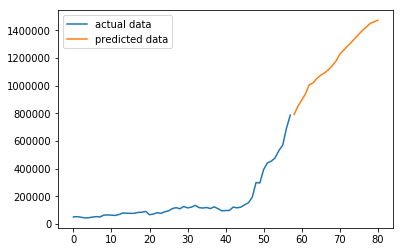

In [53]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_Renewable, trainY_tx_Renewable = create_tx_Renewable(tx_Renewable, look_back)
trainX_tx_Renewable = numpy.reshape(trainX_tx_Renewable, (trainX_tx_Renewable.shape[0], 1, trainX_tx_Renewable.shape[1]))

# re-create and fit the LSTM network
model_tx_Renewable = Sequential()
model_tx_Renewable.add(LSTM(4, input_shape=(1, look_back)))
model_tx_Renewable.add(Dense(1))
model_tx_Renewable.compile(loss='mean_squared_error', optimizer='adam')
model_tx_Renewable.fit(trainX_tx_Renewable, trainY_tx_Renewable, epochs=100, batch_size=1, verbose=2)


# making future prediction
flatten_tx_Renewable = tx_Renewable.reshape(-1)
val_tx_Renewable = flatten_tx_Renewable[-look_back:] # last batch in the training data
pred_list_tx_Renewable = []
for i_tx_Renewable in range(23): # predict the next 23 points
    pred_tx_Renewable = model_tx_Renewable.predict(val_tx_Renewable.reshape(1,1,look_back))
    pred_list_tx_Renewable = np.append(pred_list_tx_Renewable,pred_tx_Renewable)
    val_tx_Renewable = np.append(np.delete(val_tx_Renewable, 0),pred_tx_Renewable) # update the data batch to be fed in the next iteration
pred_list_tx_Renewable = pred_list_tx_Renewable.reshape(pred_list_tx_Renewable.shape[0],1)

# invert prediction
pred_list_tx_Renewable = scaler_tx_Renewable.inverse_transform(pred_list_tx_Renewable)

# plot
tx_Renewable_len = len(tx_Renewable)
print(tx_oil_len)
plt.plot(list(range(tx_Renewable_len)),scaler_tx_Renewable.inverse_transform(tx_Renewable),label="actual data")
plt.plot(list(range(tx_Renewable_len,tx_Renewable_len+len(pred_list_tx_Renewable))),pred_list_tx_Renewable,label="predicted data")
plt.legend()
plt.show()

texas renewable energy production 1965-2040

In [56]:
L_Renewable = pred_list_tx_Renewable
tx_Renewable_pre = pd.DataFrame(L_Renewable, columns=["Renewable_en_prod"])
# tx_Renewable_pre.head()
# pre_yrs = numpy.arange(2018, 2041, 1).tolist()
# pre_yrs = pd.DataFrame({"Years":pre_yrs})
# pre_yrs.head()
Renewable_pred = pd.concat([pre_yrs, tx_Renewable_pre], axis=1, sort=False)
Renewable_pred.head()
tx_Renewable = tx_energy[["Years", "Renewable_en_prod"]]
tx_Renewable.head()
TexasRenewable_prod_pre = pd.concat([tx_Renewable, Renewable_pred])
TexasRenewable_prod_pre.head()

,Years,Renewable_en_prod
0,1960,50155.0
1,1961,52023.0
2,1962,47721.0
3,1963,42718.0
4,1964,43884.0


# Texas Total Energy production Forcasting model 

In [57]:
tx_TotalEnergy= tx_energy[["Total_en_prod"]]
tx_TotalEnergy.head()

,Total_en_prod
0,12058639.0
1,12208006.0
2,12357635.0
3,12693749.0
4,13123816.0


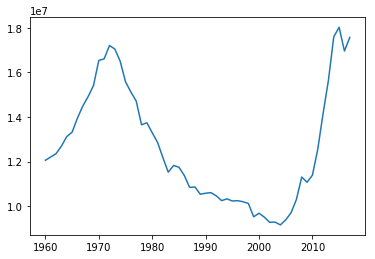

In [58]:
tx_TotalEnergy= tx_energy[["Total_en_prod"]]
tx_TotalEnergy.head()
plt.plot(tx_energy.Years,tx_TotalEnergy.Total_en_prod)

In [59]:
scaler_tx_TotalEnergy  = MinMaxScaler(feature_range=(0, 1))
tx_TotalEnergy = scaler_tx_TotalEnergy.fit_transform(tx_TotalEnergy)

# split into train and test sets
train_size_tx_TotalEnergy  = int(len(tx_TotalEnergy) * 0.67)
test_size_tx_TotalEnergy  = len(tx_TotalEnergy) - train_size_tx_TotalEnergy 
train_tx_TotalEnergy , test_tx_TotalEnergy  = tx_TotalEnergy [0:train_size_tx_TotalEnergy,:], tx_TotalEnergy [train_size_tx_TotalEnergy :len(tx_TotalEnergy),:]

# convert an array of values into a dataset matrix
def create_tx_TotalEnergy(tx_TotalEnergy, look_back=1):
	dataX_tx_TotalEnergy, dataY_tx_TotalEnergy = [], []
	for i_tx_TotalEnergy in range(len(tx_TotalEnergy)-look_back-1):
		a_tx_TotalEnergy = tx_TotalEnergy[i_tx_TotalEnergy:(i_tx_TotalEnergy+look_back), 0]
		dataX_tx_TotalEnergy.append(a_tx_TotalEnergy)
		dataY_tx_TotalEnergy.append(tx_TotalEnergy[i_tx_TotalEnergy + look_back, 0])
	return numpy.array(dataX_tx_TotalEnergy), numpy.array(dataY_tx_TotalEnergy)

# reshape into X=t and Y=t+1
look_back = 1
trainX_tx_TotalEnergy, trainY_tx_TotalEnergy = create_tx_TotalEnergy(train_tx_TotalEnergy, look_back)
testX_tx_TotalEnergy, testY_tx_TotalEnergy = create_tx_TotalEnergy(test_tx_TotalEnergy, look_back)


# reshape input to be [samples, time steps, features]
trainX_tx_TotalEnergy = numpy.reshape(trainX_tx_TotalEnergy, (trainX_tx_TotalEnergy.shape[0], 1, trainX_tx_TotalEnergy.shape[1]))
testX_tx_TotalEnergy = numpy.reshape(testX_tx_TotalEnergy, (testX_tx_TotalEnergy.shape[0], 1, testX_tx_TotalEnergy.shape[1]))

# create and fit the LSTM network
model_tx_TotalEnergy = Sequential()
model_tx_TotalEnergy.add(LSTM(4, input_shape=(1, look_back)))
model_tx_TotalEnergy.add(Dense(1))
model_tx_TotalEnergy.compile(loss='mean_squared_error', optimizer='adam')
model_tx_TotalEnergy.fit(trainX_tx_TotalEnergy, trainY_tx_TotalEnergy, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 0.2192
Epoch 2/100
 - 0s - loss: 0.1722
Epoch 3/100
 - 0s - loss: 0.1343
Epoch 4/100
 - 0s - loss: 0.1035
Epoch 5/100
 - 0s - loss: 0.0822
Epoch 6/100
 - 0s - loss: 0.0654
Epoch 7/100
 - 0s - loss: 0.0536
Epoch 8/100
 - 0s - loss: 0.0464
Epoch 9/100
 - 0s - loss: 0.0414
Epoch 10/100
 - 0s - loss: 0.0382
Epoch 11/100
 - 0s - loss: 0.0361
Epoch 12/100
 - 0s - loss: 0.0346
Epoch 13/100
 - 0s - loss: 0.0334
Epoch 14/100
 - 0s - loss: 0.0322
Epoch 15/100
 - 0s - loss: 0.0309
Epoch 16/100
 - 0s - loss: 0.0297
Epoch 17/100
 - 0s - loss: 0.0286
Epoch 18/100
 - 0s - loss: 0.0276
Epoch 19/100
 - 0s - loss: 0.0265
Epoch 20/100
 - 0s - loss: 0.0255
Epoch 21/100
 - 0s - loss: 0.0240
Epoch 22/100
 - 0s - loss: 0.0232
Epoch 23/100
 - 0s - loss: 0.0219
Epoch 24/100
 - 0s - loss: 0.0208
Epoch 25/100
 - 0s - loss: 0.0200
Epoch 26/100
 - 0s - loss: 0.0188
Epoch 27/100
 - 0s - loss: 0.0177
Epoch 28/100
 - 0s - loss: 0.0167
Epoch 29/100
 - 0s - loss: 0.0160
Epoch 30/100
 - 0s - lo

Train Score: 461454.69 RMSE
Test Score: 880388.19 RMSE


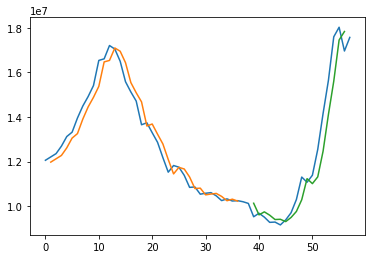

In [60]:
# make predictions
trainPredict_tx_TotalEnergy = model_tx_TotalEnergy.predict(trainX_tx_TotalEnergy)
testPredict_tx_TotalEnergy = model_tx_TotalEnergy.predict(testX_tx_TotalEnergy)
# invert predictions
trainPredict_tx_TotalEnergy = scaler_tx_TotalEnergy.inverse_transform(trainPredict_tx_TotalEnergy)
trainY_tx_TotalEnergy = scaler_tx_TotalEnergy.inverse_transform([trainY_tx_TotalEnergy])
testPredict_tx_TotalEnergy = scaler_tx_TotalEnergy.inverse_transform(testPredict_tx_TotalEnergy)
testY_tx_TotalEnergy = scaler_tx_TotalEnergy.inverse_transform([testY_tx_TotalEnergy])
# calculate root mean squared error
trainScore_tx_TotalEnergy = math.sqrt(mean_squared_error(trainY_tx_TotalEnergy[0], trainPredict_tx_TotalEnergy[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_tx_TotalEnergy))
testScore_tx_TotalEnergy = math.sqrt(mean_squared_error(testY_tx_TotalEnergy[0], testPredict_tx_TotalEnergy[:,0]))
print('Test Score: %.2f RMSE' % (testScore_tx_TotalEnergy))

# shift train predictions for plotting
trainPredictPlot_tx_TotalEnergy = numpy.empty_like(tx_TotalEnergy)
trainPredictPlot_tx_TotalEnergy[:, :] = numpy.nan
trainPredictPlot_tx_TotalEnergy[look_back:len(trainPredict_tx_TotalEnergy)+look_back, :] = trainPredict_tx_TotalEnergy
# shift test predictions for plotting
testPredictPlot_tx_TotalEnergy = numpy.empty_like(tx_TotalEnergy)
testPredictPlot_tx_TotalEnergy[:, :] = numpy.nan
testPredictPlot_tx_TotalEnergy[len(trainPredict_tx_TotalEnergy)+(look_back*2)+1:len(tx_TotalEnergy)-1, :] = testPredict_tx_TotalEnergy
# plot baseline and predictions
plt.plot(scaler_tx_TotalEnergy.inverse_transform(tx_TotalEnergy))
plt.plot(trainPredictPlot_tx_TotalEnergy)
plt.plot(testPredictPlot_tx_TotalEnergy)
plt.show()

Epoch 1/100
 - 4s - loss: 0.1619
Epoch 2/100
 - 0s - loss: 0.1427
Epoch 3/100
 - 0s - loss: 0.1318
Epoch 4/100
 - 0s - loss: 0.1205
Epoch 5/100
 - 0s - loss: 0.1104
Epoch 6/100
 - 0s - loss: 0.1023
Epoch 7/100
 - 0s - loss: 0.0943
Epoch 8/100
 - 0s - loss: 0.0867
Epoch 9/100
 - 0s - loss: 0.0794
Epoch 10/100
 - 0s - loss: 0.0736
Epoch 11/100
 - 0s - loss: 0.0658
Epoch 12/100
 - 0s - loss: 0.0597
Epoch 13/100
 - 0s - loss: 0.0547
Epoch 14/100
 - 0s - loss: 0.0471
Epoch 15/100
 - 0s - loss: 0.0425
Epoch 16/100
 - 0s - loss: 0.0365
Epoch 17/100
 - 0s - loss: 0.0325
Epoch 18/100
 - 0s - loss: 0.0274
Epoch 19/100
 - 0s - loss: 0.0240
Epoch 20/100
 - 0s - loss: 0.0207
Epoch 21/100
 - 0s - loss: 0.0176
Epoch 22/100
 - 0s - loss: 0.0152
Epoch 23/100
 - 0s - loss: 0.0134
Epoch 24/100
 - 0s - loss: 0.0119
Epoch 25/100
 - 0s - loss: 0.0110
Epoch 26/100
 - 0s - loss: 0.0095
Epoch 27/100
 - 0s - loss: 0.0087
Epoch 28/100
 - 0s - loss: 0.0082
Epoch 29/100
 - 0s - loss: 0.0078
Epoch 30/100
 - 0s - lo

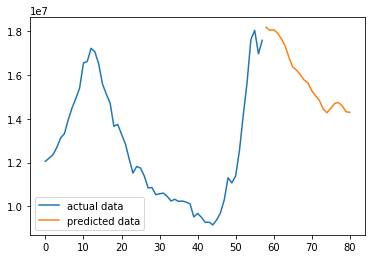

In [61]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_TotalEnergy, trainY_tx_TotalEnergy = create_tx_TotalEnergy(tx_TotalEnergy, look_back)
trainX_tx_TotalEnergy = numpy.reshape(trainX_tx_TotalEnergy, (trainX_tx_TotalEnergy.shape[0], 1, trainX_tx_TotalEnergy.shape[1]))

# re-create and fit the LSTM network
model_tx_TotalEnergy = Sequential()
model_tx_TotalEnergy.add(LSTM(4, input_shape=(1, look_back)))
model_tx_TotalEnergy.add(Dense(1))
model_tx_TotalEnergy.compile(loss='mean_squared_error', optimizer='adam')
model_tx_TotalEnergy.fit(trainX_tx_TotalEnergy, trainY_tx_TotalEnergy, epochs=100, batch_size=1, verbose=2)


# making future prediction
flatten_tx_TotalEnergy = tx_TotalEnergy.reshape(-1)
val_tx_TotalEnergy = flatten_tx_TotalEnergy[-look_back:] # last batch in the training data
pred_list_tx_TotalEnergy = []
for i_tx_TotalEnergy in range(23): # predict the next 23 points
    pred_tx_TotalEnergy = model_tx_TotalEnergy.predict(val_tx_TotalEnergy.reshape(1,1,look_back))
    pred_list_tx_TotalEnergy = np.append(pred_list_tx_TotalEnergy,pred_tx_TotalEnergy)
    val_tx_TotalEnergy = np.append(np.delete(val_tx_TotalEnergy, 0),pred_tx_TotalEnergy) # update the data batch to be fed in the next iteration
pred_list_tx_TotalEnergy = pred_list_tx_TotalEnergy.reshape(pred_list_tx_TotalEnergy.shape[0],1)

# invert prediction
pred_list_tx_TotalEnergy = scaler_tx_TotalEnergy.inverse_transform(pred_list_tx_TotalEnergy)

# plot
tx_TotalEnergy_len = len(tx_TotalEnergy)
print(tx_oil_len)
plt.plot(list(range(tx_TotalEnergy_len)),scaler_tx_TotalEnergy.inverse_transform(tx_TotalEnergy),label="actual data")
plt.plot(list(range(tx_TotalEnergy_len,tx_TotalEnergy_len+len(pred_list_tx_TotalEnergy))),pred_list_tx_TotalEnergy,label="predicted data")
plt.legend()
plt.show()

texas renewable energy production 1965-2040

In [62]:
L_TotalEnergy = pred_list_tx_TotalEnergy
tx_TotalEnergy_pre = pd.DataFrame(L_TotalEnergy, columns=["Total_en_prod"])
# tx_TotalEnergy_pre.head()
# pre_yrs = numpy.arange(2018, 2041, 1).tolist()
# pre_yrs = pd.DataFrame({"Years":pre_yrs})
# pre_yrs.head()
TotalEnergy_pred = pd.concat([pre_yrs, tx_TotalEnergy_pre], axis=1, sort=False)
TotalEnergy_pred.head()
tx_TotalEnergy = tx_energy[["Years", "Total_en_prod"]]
tx_TotalEnergy.head()
TexasTotalEnergy_prod_pre = pd.concat([tx_TotalEnergy, TotalEnergy_pred])
TexasTotalEnergy_prod_pre.head()

,Years,Total_en_prod
0,1960,12058639.0
1,1961,12208006.0
2,1962,12357635.0
3,1963,12693749.0
4,1964,13123816.0


# Texas Total energy consumption forcast model 

In [63]:
tx_TotalEnergy_consumption= tx_energy[["Total_en_consumption"]]
tx_TotalEnergy_consumption.head()


,Total_en_consumption
0,4416216.0
1,4447880.0
2,4640675.0
3,4894089.0
4,5012683.0


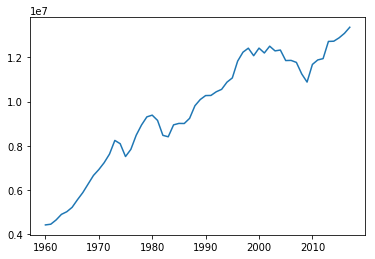

In [64]:
tx_TotalEnergy_consumption= tx_energy[["Total_en_consumption"]]
tx_TotalEnergy_consumption.head()
plt.plot(tx_energy.Years,tx_TotalEnergy_consumption.Total_en_consumption)

In [65]:
scaler_tx_TotalEnergy_consumption  = MinMaxScaler(feature_range=(0, 1))
tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.fit_transform(tx_TotalEnergy_consumption)

# split into train and test sets
train_size_tx_TotalEnergy_consumption  = int(len(tx_TotalEnergy_consumption) * 0.67)
test_size_tx_TotalEnergy_consumption  = len(tx_TotalEnergy_consumption) - train_size_tx_TotalEnergy_consumption 
train_tx_TotalEnergy_consumption , test_tx_TotalEnergy_consumption  = tx_TotalEnergy_consumption [0:train_size_tx_TotalEnergy_consumption,:], tx_TotalEnergy_consumption [train_size_tx_TotalEnergy_consumption :len(tx_TotalEnergy_consumption),:]

# convert an array of values into a dataset matrix
def create_tx_TotalEnergy_consumption(tx_TotalEnergy_consumption, look_back=1):
	dataX_tx_TotalEnergy_consumption, dataY_tx_TotalEnergy_consumption = [], []
	for i_tx_TotalEnergy_consumption in range(len(tx_TotalEnergy_consumption)-look_back-1):
		a_tx_TotalEnergy_consumption = tx_TotalEnergy_consumption[i_tx_TotalEnergy_consumption:(i_tx_TotalEnergy_consumption+look_back), 0]
		dataX_tx_TotalEnergy_consumption.append(a_tx_TotalEnergy_consumption)
		dataY_tx_TotalEnergy_consumption.append(tx_TotalEnergy_consumption[i_tx_TotalEnergy_consumption + look_back, 0])
	return numpy.array(dataX_tx_TotalEnergy_consumption), numpy.array(dataY_tx_TotalEnergy_consumption)

# reshape into X=t and Y=t+1
look_back = 1
trainX_tx_TotalEnergy_consumption, trainY_tx_TotalEnergy_consumption = create_tx_TotalEnergy_consumption(train_tx_TotalEnergy_consumption, look_back)
testX_tx_TotalEnergy_consumption, testY_tx_TotalEnergy_consumption = create_tx_TotalEnergy_consumption(test_tx_TotalEnergy_consumption, look_back)


# reshape input to be [samples, time steps, features]
trainX_tx_TotalEnergy_consumption = numpy.reshape(trainX_tx_TotalEnergy_consumption, (trainX_tx_TotalEnergy_consumption.shape[0], 1, trainX_tx_TotalEnergy_consumption.shape[1]))
testX_tx_TotalEnergy_consumption = numpy.reshape(testX_tx_TotalEnergy_consumption, (testX_tx_TotalEnergy_consumption.shape[0], 1, testX_tx_TotalEnergy_consumption.shape[1]))

# create and fit the LSTM network
model_tx_TotalEnergy_consumption = Sequential()
model_tx_TotalEnergy_consumption.add(LSTM(4, input_shape=(1, look_back)))
model_tx_TotalEnergy_consumption.add(Dense(1))
model_tx_TotalEnergy_consumption.compile(loss='mean_squared_error', optimizer='adam')
model_tx_TotalEnergy_consumption.fit(trainX_tx_TotalEnergy_consumption, trainY_tx_TotalEnergy_consumption, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 0.2368
Epoch 2/100
 - 0s - loss: 0.1823
Epoch 3/100
 - 0s - loss: 0.1406
Epoch 4/100
 - 0s - loss: 0.1086
Epoch 5/100
 - 0s - loss: 0.0839
Epoch 6/100
 - 0s - loss: 0.0669
Epoch 7/100
 - 0s - loss: 0.0539
Epoch 8/100
 - 0s - loss: 0.0452
Epoch 9/100
 - 0s - loss: 0.0394
Epoch 10/100
 - 0s - loss: 0.0356
Epoch 11/100
 - 0s - loss: 0.0330
Epoch 12/100
 - 0s - loss: 0.0311
Epoch 13/100
 - 0s - loss: 0.0298
Epoch 14/100
 - 0s - loss: 0.0286
Epoch 15/100
 - 0s - loss: 0.0275
Epoch 16/100
 - 0s - loss: 0.0266
Epoch 17/100
 - 0s - loss: 0.0255
Epoch 18/100
 - 0s - loss: 0.0245
Epoch 19/100
 - 0s - loss: 0.0237
Epoch 20/100
 - 0s - loss: 0.0227
Epoch 21/100
 - 0s - loss: 0.0217
Epoch 22/100
 - 0s - loss: 0.0211
Epoch 23/100
 - 0s - loss: 0.0198
Epoch 24/100
 - 0s - loss: 0.0189
Epoch 25/100
 - 0s - loss: 0.0181
Epoch 26/100
 - 0s - loss: 0.0171
Epoch 27/100
 - 0s - loss: 0.0162
Epoch 28/100
 - 0s - loss: 0.0154
Epoch 29/100
 - 0s - loss: 0.0144
Epoch 30/100
 - 0s - lo

Train Score: 309887.97 RMSE
Test Score: 365571.64 RMSE


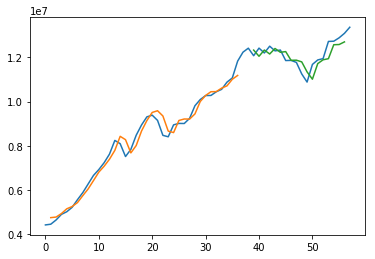

In [66]:
# make predictions
trainPredict_tx_TotalEnergy_consumption = model_tx_TotalEnergy_consumption.predict(trainX_tx_TotalEnergy_consumption)
testPredict_tx_TotalEnergy_consumption = model_tx_TotalEnergy_consumption.predict(testX_tx_TotalEnergy_consumption)
# invert predictions
trainPredict_tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.inverse_transform(trainPredict_tx_TotalEnergy_consumption)
trainY_tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.inverse_transform([trainY_tx_TotalEnergy_consumption])
testPredict_tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.inverse_transform(testPredict_tx_TotalEnergy_consumption)
testY_tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.inverse_transform([testY_tx_TotalEnergy_consumption])
# calculate root mean squared error
trainScore_tx_TotalEnergy_consumption = math.sqrt(mean_squared_error(trainY_tx_TotalEnergy_consumption[0], trainPredict_tx_TotalEnergy_consumption[:,0]))
print('Train Score: %.2f RMSE' % (trainScore_tx_TotalEnergy_consumption))
testScore_tx_TotalEnergy_consumption = math.sqrt(mean_squared_error(testY_tx_TotalEnergy_consumption[0], testPredict_tx_TotalEnergy_consumption[:,0]))
print('Test Score: %.2f RMSE' % (testScore_tx_TotalEnergy_consumption))

# shift train predictions for plotting
trainPredictPlot_tx_TotalEnergy_consumption = numpy.empty_like(tx_TotalEnergy_consumption)
trainPredictPlot_tx_TotalEnergy_consumption[:, :] = numpy.nan
trainPredictPlot_tx_TotalEnergy_consumption[look_back:len(trainPredict_tx_TotalEnergy_consumption)+look_back, :] = trainPredict_tx_TotalEnergy_consumption
# shift test predictions for plotting
testPredictPlot_tx_TotalEnergy_consumption = numpy.empty_like(tx_TotalEnergy_consumption)
testPredictPlot_tx_TotalEnergy_consumption[:, :] = numpy.nan
testPredictPlot_tx_TotalEnergy_consumption[len(trainPredict_tx_TotalEnergy_consumption)+(look_back*2)+1:len(tx_TotalEnergy_consumption)-1, :] = testPredict_tx_TotalEnergy_consumption
# plot baseline and predictions
plt.plot(scaler_tx_TotalEnergy_consumption.inverse_transform(tx_TotalEnergy_consumption))
plt.plot(trainPredictPlot_tx_TotalEnergy_consumption)
plt.plot(testPredictPlot_tx_TotalEnergy_consumption)
plt.show()

Epoch 1/100
 - 4s - loss: 0.2041
Epoch 2/100
 - 0s - loss: 0.0359
Epoch 3/100
 - 0s - loss: 0.0267
Epoch 4/100
 - 0s - loss: 0.0201
Epoch 5/100
 - 0s - loss: 0.0154
Epoch 6/100
 - 0s - loss: 0.0125
Epoch 7/100
 - 0s - loss: 0.0096
Epoch 8/100
 - 0s - loss: 0.0075
Epoch 9/100
 - 0s - loss: 0.0062
Epoch 10/100
 - 0s - loss: 0.0053
Epoch 11/100
 - 0s - loss: 0.0046
Epoch 12/100
 - 0s - loss: 0.0041
Epoch 13/100
 - 0s - loss: 0.0038
Epoch 14/100
 - 0s - loss: 0.0036
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0032
Epoch 17/100
 - 0s - loss: 0.0032
Epoch 18/100
 - 0s - loss: 0.0030
Epoch 19/100
 - 0s - loss: 0.0032
Epoch 20/100
 - 0s - loss: 0.0029
Epoch 21/100
 - 0s - loss: 0.0029
Epoch 22/100
 - 0s - loss: 0.0031
Epoch 23/100
 - 0s - loss: 0.0028
Epoch 24/100
 - 0s - loss: 0.0031
Epoch 25/100
 - 0s - loss: 0.0028
Epoch 26/100
 - 0s - loss: 0.0031
Epoch 27/100
 - 0s - loss: 0.0031
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0028
Epoch 30/100
 - 0s - lo

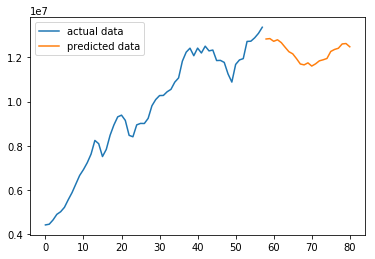

In [67]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX_tx_TotalEnergy_consumption, trainY_tx_TotalEnergy_consumption = create_tx_TotalEnergy_consumption(tx_TotalEnergy_consumption, look_back)
trainX_tx_TotalEnergy_consumption = numpy.reshape(trainX_tx_TotalEnergy_consumption, (trainX_tx_TotalEnergy_consumption.shape[0], 1, trainX_tx_TotalEnergy_consumption.shape[1]))

# re-create and fit the LSTM network
model_tx_TotalEnergy_consumption = Sequential()
model_tx_TotalEnergy_consumption.add(LSTM(4, input_shape=(1, look_back)))
model_tx_TotalEnergy_consumption.add(Dense(1))
model_tx_TotalEnergy_consumption.compile(loss='mean_squared_error', optimizer='adam')
model_tx_TotalEnergy_consumption.fit(trainX_tx_TotalEnergy_consumption, trainY_tx_TotalEnergy_consumption, epochs=100, batch_size=1, verbose=2)


# making future prediction
flatten_tx_TotalEnergy_consumption = tx_TotalEnergy_consumption.reshape(-1)
val_tx_TotalEnergy_consumption = flatten_tx_TotalEnergy_consumption[-look_back:] # last batch in the training data
pred_list_tx_TotalEnergy_consumption = []
for i_tx_TotalEnergy_consumption in range(23): # predict the next 23 points
    pred_tx_TotalEnergy_consumption = model_tx_TotalEnergy_consumption.predict(val_tx_TotalEnergy_consumption.reshape(1,1,look_back))
    pred_list_tx_TotalEnergy_consumption = np.append(pred_list_tx_TotalEnergy_consumption,pred_tx_TotalEnergy_consumption)
    val_tx_TotalEnergy_consumption = np.append(np.delete(val_tx_TotalEnergy_consumption, 0),pred_tx_TotalEnergy_consumption) # update the data batch to be fed in the next iteration
pred_list_tx_TotalEnergy_consumption = pred_list_tx_TotalEnergy_consumption.reshape(pred_list_tx_TotalEnergy_consumption.shape[0],1)

# invert prediction
pred_list_tx_TotalEnergy_consumption = scaler_tx_TotalEnergy_consumption.inverse_transform(pred_list_tx_TotalEnergy_consumption)

# plot
tx_TotalEnergy_consumption_len = len(tx_TotalEnergy_consumption)
print(tx_oil_len)
plt.plot(list(range(tx_TotalEnergy_consumption_len)),scaler_tx_TotalEnergy_consumption.inverse_transform(tx_TotalEnergy_consumption),label="actual data")
plt.plot(list(range(tx_TotalEnergy_consumption_len,tx_TotalEnergy_consumption_len+len(pred_list_tx_TotalEnergy_consumption))),pred_list_tx_TotalEnergy_consumption,label="predicted data")
plt.legend()
plt.show()

texas renewable energy production 1965-2040

In [68]:
L_TotalEnergy_consumption = pred_list_tx_TotalEnergy_consumption
tx_TotalEnergy_consumption_pre = pd.DataFrame(L_TotalEnergy_consumption, columns=["Total_en_consumption"])

TotalEnergy_consumption_pred = pd.concat([pre_yrs, tx_TotalEnergy_consumption_pre], axis=1, sort=False)
TotalEnergy_consumption_pred.head()
tx_TotalEnergy_consumption = tx_energy[["Years", "Total_en_consumption"]]
tx_TotalEnergy_consumption.head()
TexasTotalEnergy_consumption_prod_pre = pd.concat([tx_TotalEnergy_consumption, TotalEnergy_consumption_pred])
TexasTotalEnergy_consumption_prod_pre.head()


,Years,Total_en_consumption
0,1960,4416216.0
1,1961,4447880.0
2,1962,4640675.0
3,1963,4894089.0
4,1964,5012683.0


# merge all productions/predictions into one dataframe 

In [69]:
from functools import reduce
dfs = [TexasCoal_prod_pre, TexasOil_prod_pre, Texasgas_prod_pre, TexasRenewable_prod_pre, TexasTotalEnergy_prod_pre, TexasTotalEnergy_consumption_prod_pre]

TexasEnergy = reduce(lambda left,right: pd.merge(left,right,on='Years'), dfs)
TexasEnergy

,Years,Coal_prod,Oil_prod,Gas_prod,Renewable_en_prod,Total_en_prod,Total_en_consumption
0,1960,26409.000000,5.379378e+06,6.602696e+06,5.015500e+04,1.205864e+07,4.416216e+06
1,1961,26535.000000,5.447308e+06,6.682140e+06,5.202300e+04,1.220801e+07,4.447880e+06
2,1962,25855.000000,5.471272e+06,6.812787e+06,4.772100e+04,1.235764e+07,4.640675e+06
3,1963,27441.000000,5.671135e+06,6.952455e+06,4.271800e+04,1.269375e+07,4.894089e+06
4,1964,28839.000000,5.739216e+06,7.311876e+06,4.388400e+04,1.312382e+07,5.012683e+06
5,1965,30349.000000,5.804308e+06,7.436127e+06,4.896700e+04,1.331975e+07,5.212184e+06
6,1966,28360.000000,6.127692e+06,7.746648e+06,5.198000e+04,1.395468e+07,5.557255e+06
7,1967,27102.000000,6.480449e+06,7.934585e+06,4.994400e+04,1.449208e+07,5.879030e+06
8,1968,28839.000000,6.555601e+06,8.271293e+06,6.293900e+04,1.491867e+07,6.268911e+06
9,1969,28310.000000,6.664147e+06,8.654795e+06,6.435100e+04,1.541160e+07,6.656323e+06


In [70]:

np.round(TexasEnergy, decimals=2)

,Years,Coal_prod,Oil_prod,Gas_prod,Renewable_en_prod,Total_en_prod,Total_en_consumption
0,1960,26409.00,5379378.00,6602696.00,50155.00,12058639.00,4416216.00
1,1961,26535.00,5447308.00,6682140.00,52023.00,12208006.00,4447880.00
2,1962,25855.00,5471272.00,6812787.00,47721.00,12357635.00,4640675.00
3,1963,27441.00,5671135.00,6952455.00,42718.00,12693749.00,4894089.00
4,1964,28839.00,5739216.00,7311876.00,43884.00,13123816.00,5012683.00
5,1965,30349.00,5804308.00,7436127.00,48967.00,13319750.00,5212184.00
6,1966,28360.00,6127692.00,7746648.00,51980.00,13954680.00,5557255.00
7,1967,27102.00,6480449.00,7934585.00,49944.00,14492080.00,5879030.00
8,1968,28839.00,6555601.00,8271293.00,62939.00,14918671.00,6268911.00
9,1969,28310.00,6664147.00,8654795.00,64351.00,15411603.00,6656323.00


In [71]:
TexasEnergy.to_csv("TexasEnergy_60_65.csv")
